Demo of Altair


In [2]:
import altair as alt
from vega_datasets import data

iris = data.iris()

Build a basic graph that is interactive

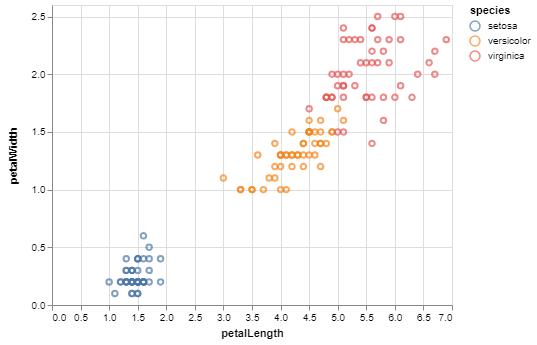

In [3]:
interval = alt.selection_interval(encodings=['x','y'])
alt.Chart(iris).mark_point().encode(
    x='petalLength',
    y='petalWidth',
    color='species'
).interactive()

In [4]:
##Add a selection interval for the plot, the encodings specify which directions it goes in

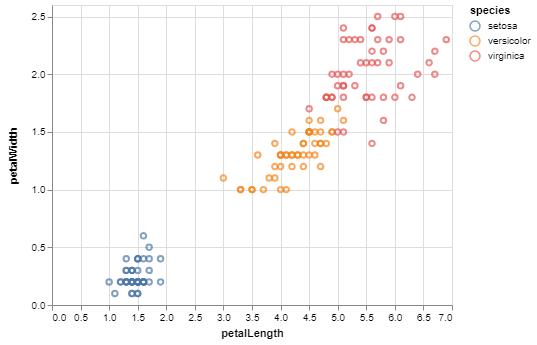

In [5]:
interval = alt.selection_interval(encodings=['x','y'])
alt.Chart(iris).mark_point().encode(
    x='petalLength',
    y='petalWidth',
    color='species'
).interactive().properties(selection=interval)

In [6]:
#Insert a chart where the color is conditional on the interval
chart = alt.Chart(iris).mark_point().encode(
    x='petalLength',
    y='petalWidth',
    color=alt.condition(interval, 'species', alt.value('lightgray')),  #Conditional on interval, normally color based on species otherwise light gray
).interactive().properties(selection=interval)


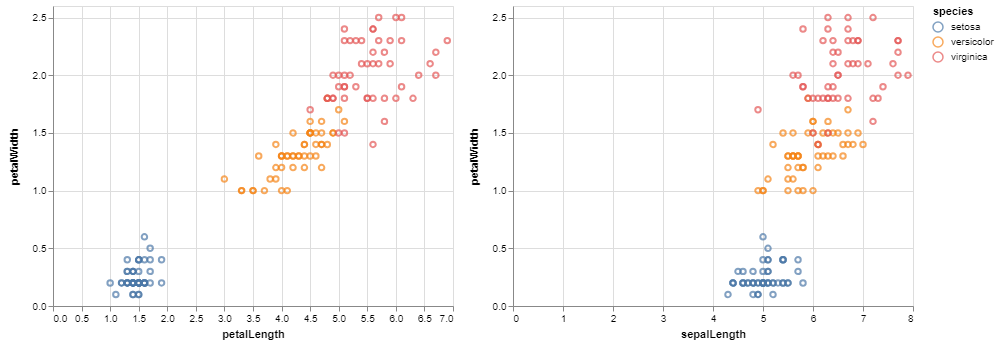

In [7]:
#Host 2 of the same plot side by side with a different X encoded on 1

chart | chart.encode(x='sepalLength')

In [8]:
#lets try it with the cars data
cars = data.cars()
cars.head()

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year
0,12.0,8,307.0,130.0,18.0,chevrolet chevelle malibu,USA,3504,1970-01-01
1,11.5,8,350.0,165.0,15.0,buick skylark 320,USA,3693,1970-01-01
2,11.0,8,318.0,150.0,18.0,plymouth satellite,USA,3436,1970-01-01
3,12.0,8,304.0,150.0,16.0,amc rebel sst,USA,3433,1970-01-01
4,10.5,8,302.0,140.0,17.0,ford torino,USA,3449,1970-01-01


In [9]:
cars_dict = alt.Chart(cars).mark_point().encode(
    x='Weight_in_lbs',
    y='Miles_per_Gallon',
    color='Origin'
).to_dict()

In [10]:
#We can output the JSON code about the figure as a dict, and read it back in later

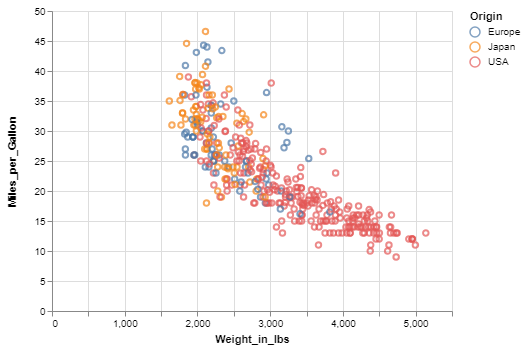

In [11]:
alt.Chart().from_dict(cars_dict)

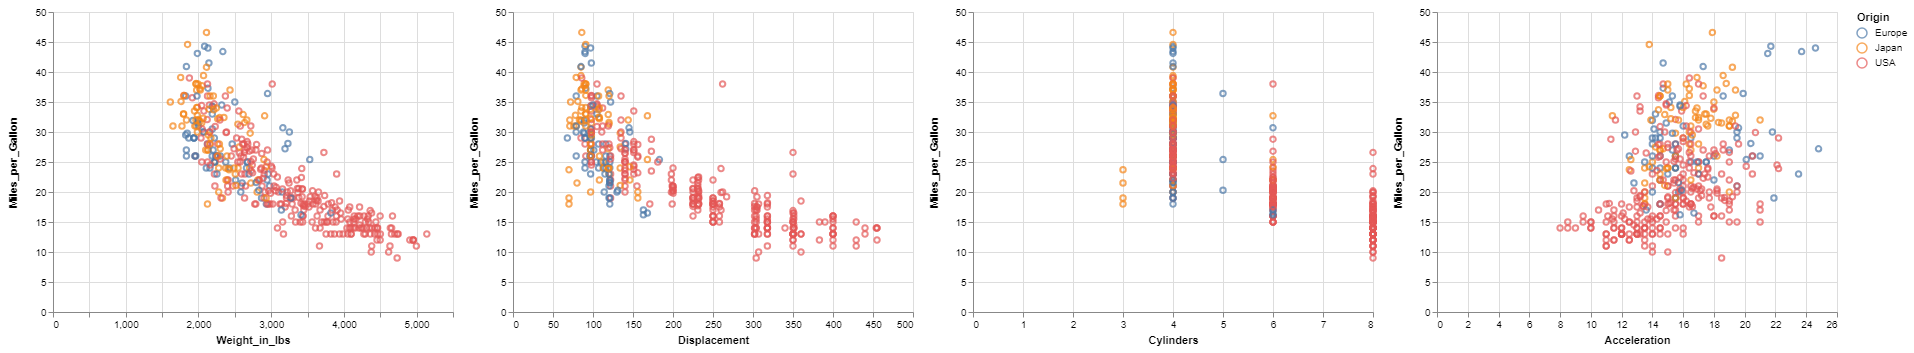

In [26]:
interval = alt.selection_interval()
cars_chart = alt.Chart(cars).mark_point().encode(
    x='Weight_in_lbs',
    y='Miles_per_Gallon',
    color=alt.condition(interval, 'Origin', alt.value('lightgray')),
    tooltip='Name'
).interactive().properties(selection=interval)

cars_chart | cars_chart.encode(x='Displacement') | cars_chart.encode(x='Cylinders') | cars_chart.encode(x='Acceleration')

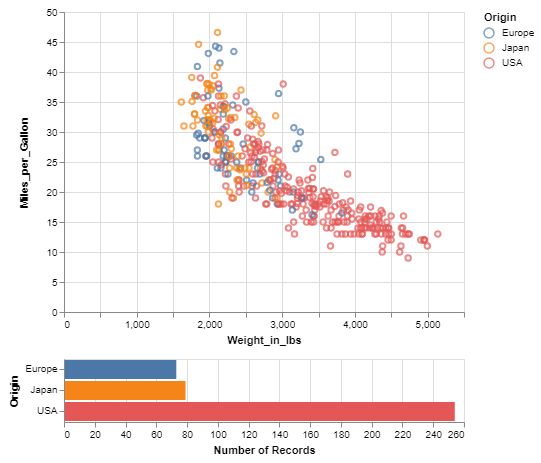

In [52]:
hist = alt.Chart(cars).mark_bar().encode(
    x='count()',
    y='Origin',
    color='Origin'
).transform_filter(
    interval
)

cars_chart & hist
alt.vconcat(cars_chart, hist)


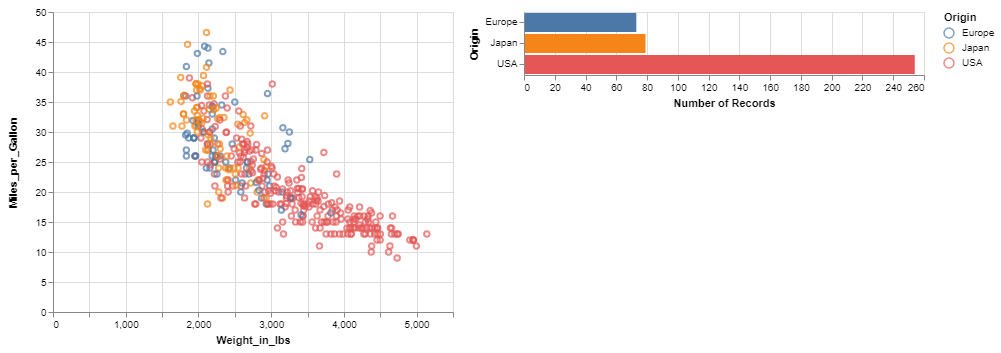

In [61]:
hist = alt.Chart(cars).mark_bar().encode(
    x='count()',
    y='Origin',
    color='Origin'
).transform_filter(
    interval
)

cars_chart & hist
alt.hconcat(cars_chart, hist)

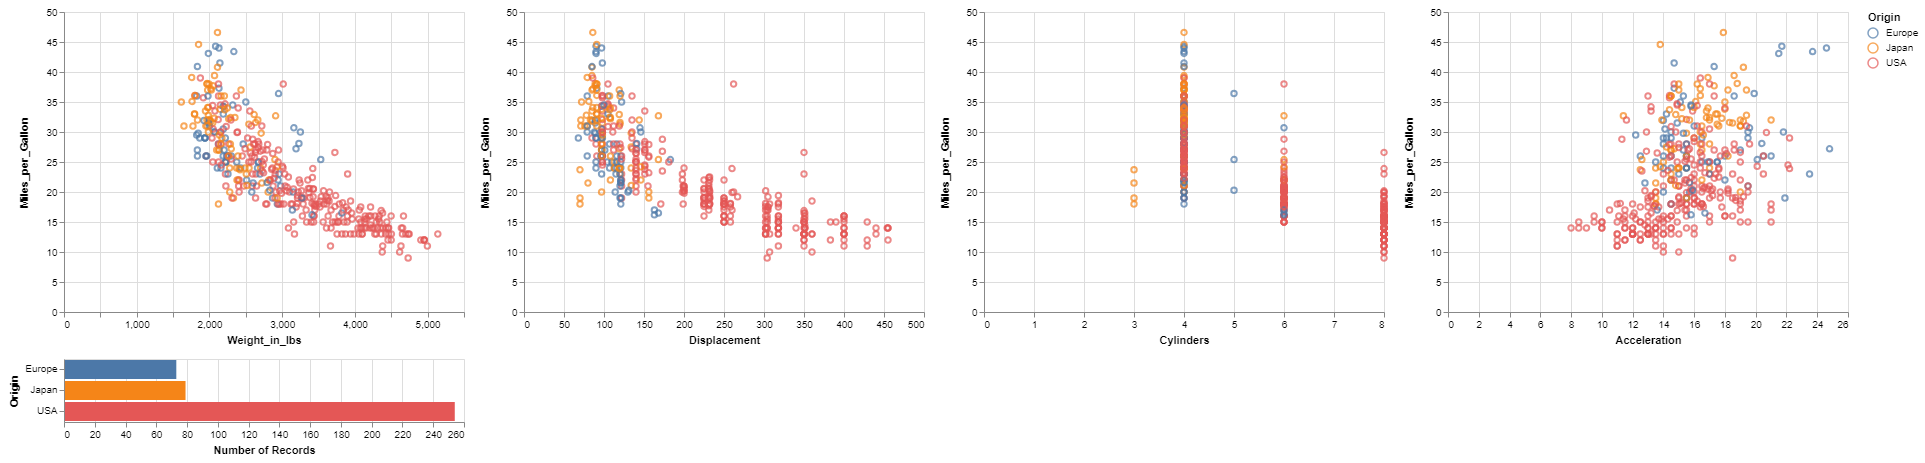

In [47]:
(cars_chart | cars_chart.encode(x='Displacement') | cars_chart.encode(x='Cylinders') | cars_chart.encode(x='Acceleration')) & hist

In [49]:
##Three core pieces - Data, Marks, Encodings

#Encoiding types, Q quantitative, N Nominal, O ordinal, T Temporal
#Quantitative numerical quantity real valued #continuous data
#Nominal name/unordered categy
#ordinal ordered categorical # cylinders
#temporal time

#Binning and Aggregation
'''
mark_point()
mark_circle()
mark_square()
mark_line()
mark_area()
mark_bar()
mark_tick()

Encodings
x: x-axis value
y: y-axis value
color: color of the mark
opacity: transparency/opacity of the mark
shape: shape of the mark
size: size of the mark
row: row within a grid of facet plots
column: column within a grid of facet plots
'''

#Bertins "Levels of Organization"
#suitable for ordered 2d pos, size, color value
#suitable for unordered data texture, color hue, angle, shape



'\nmark_point()\nmark_circle()\nmark_square()\nmark_line()\nmark_area()\nmark_bar()\nmark_tick()\n'

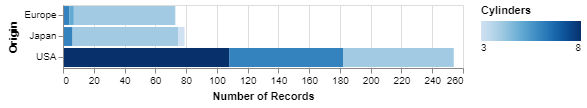

In [50]:
alt.Chart(cars).mark_bar().encode(
    y='Origin',
    x='count()',
    color='Cylinders'
)

Alternatively, Altair provides a JSON data transformer that will automatically store your data to disk and reference it by URL when a chart is rendered:

chart = alt.Chart(data).mark_line().encode(
 x='x:Q',
 y='y:Q'
)

with alt.data_transformers.enable('json'):
    pprint(chart.to_dict())

In [53]:
alt.data_transformers.enable('json')

DataTransformerRegistry.enable('json')

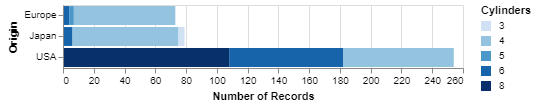

In [60]:
#Quantitative numerical quantity real valued #continuous data
#Nominal name/unordered categy
#ordinal ordered categorical # cylinders
#temporal time

alt.Chart(cars).mark_bar().encode(
    y='Origin:N',
    x='count()',
    color='Cylinders:O'
)

In [55]:
#Notice difference between Ordinal and Quantitative Legend
#Good to explicity set, since they are automatically inferred

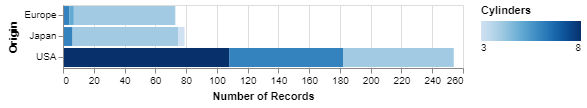

In [63]:
alt.Chart(cars).mark_bar().encode(
    y='Origin:N',
    x='count()',
    color='Cylinders:Q'
)

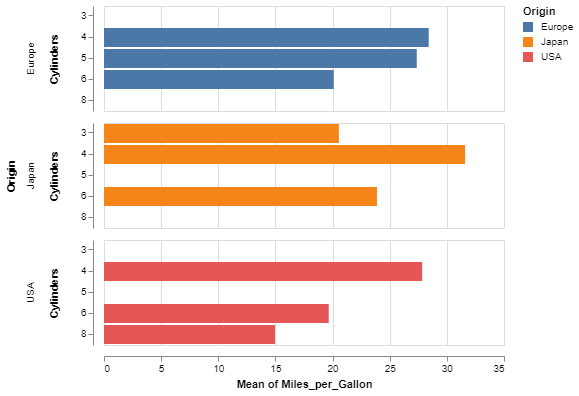

In [70]:
#alt.data_transformers.enable('default', max_rows=None)
alt.Chart(cars).mark_bar().encode(
    y='Cylinders:O',
    row='Origin:N',
    x='mean(Miles_per_Gallon)',
    color='Cylinders:Q'
)

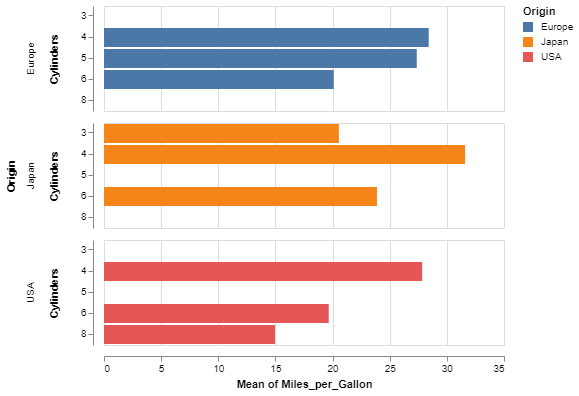

In [73]:
alt.Chart(cars).mark_bar().encode(
    y='Cylinders:O',
    row='Origin:N',
    x='mean(Miles_per_Gallon)',
    color='Origin:N'
)

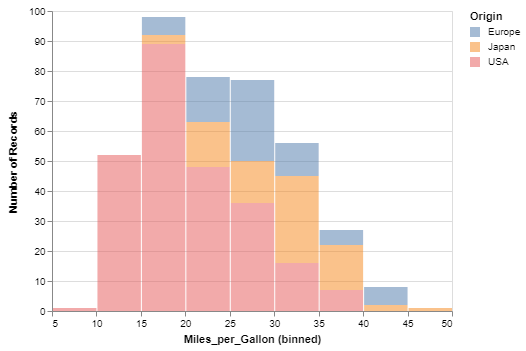

In [82]:
alt.Chart(cars).mark_bar(opacity=0.5).encode(
    y='count()',
    x = alt.X('Miles_per_Gallon',bin=True),
    color='Origin:N'
)

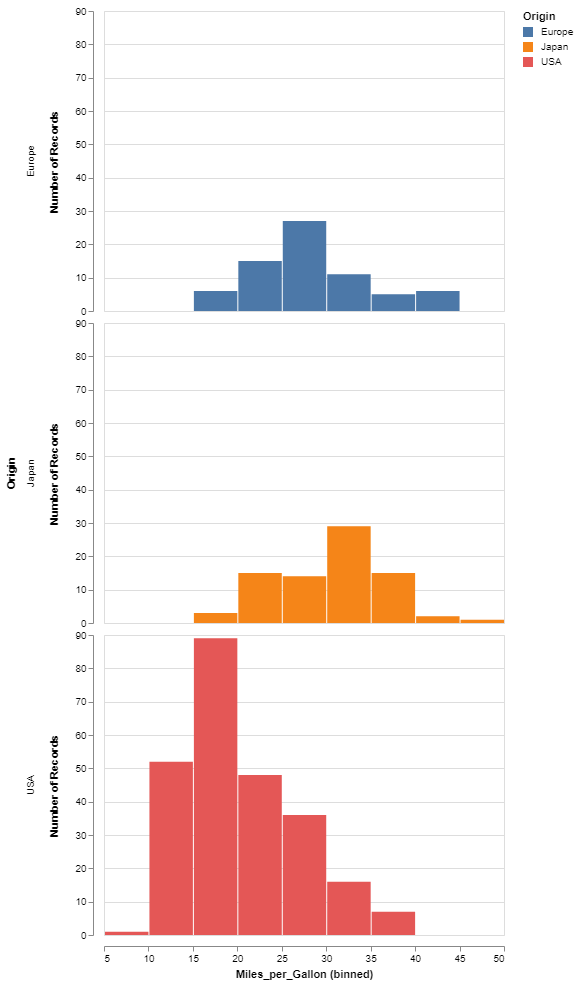

In [83]:
alt.Chart(cars).mark_bar().encode(
    y='count()',
    x = alt.X('Miles_per_Gallon',bin=True),
    row='Origin:N',
    color='Origin:N'
)

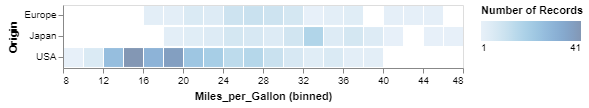

In [92]:
alt.Chart(cars).mark_bar(opacity=0.5).encode(
    color='count()',
    x = alt.X('Miles_per_Gallon',bin=alt.Bin(maxbins=20)),
    y='Origin:N'
)

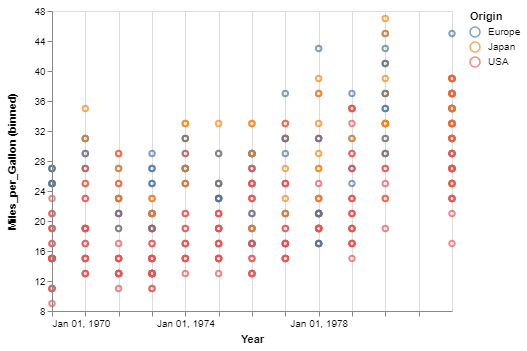

In [96]:
alt.Chart(cars).mark_point().encode(
    x = 'Year:T',
    y = alt.Y('Miles_per_Gallon',bin=alt.Bin(maxbins=20)),
    color='Origin:N'
)

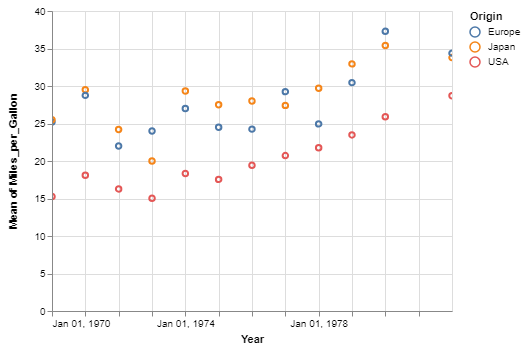

In [101]:
alt.Chart(cars).mark_point().encode(
    x = 'Year:T',
    y = alt.Y('mean(Miles_per_Gallon)'),
    color='Origin:N',
    tooltip=['mean(Miles_per_Gallon)','Year']
).interactive()

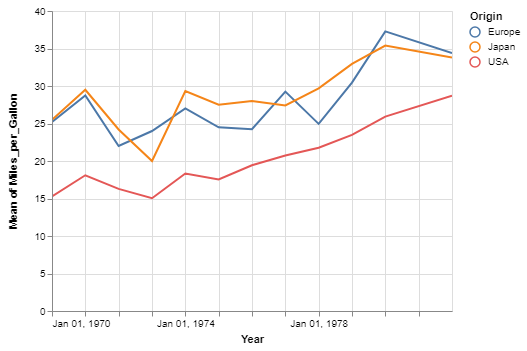

In [108]:
alt.Chart(cars).mark_line().encode(
    x = 'Year:T',
    y = alt.Y('mean(Miles_per_Gallon)'),
    color='Origin:N',
    tooltip=['mean(Miles_per_Gallon)','Year']
).interactive()

In [ ]:
##C1 and c0 and the 1st and 0th confidence interval

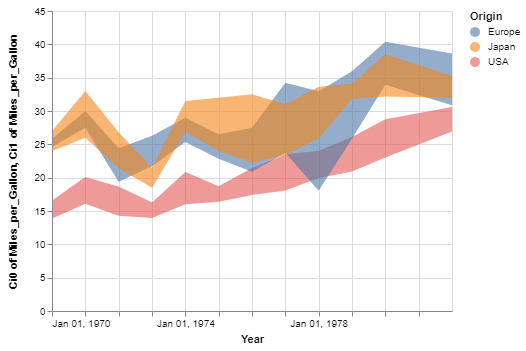

In [107]:
alt.Chart(cars).mark_area(opacity=0.6).encode(
    x = 'Year:T',
    y = alt.Y('ci0(Miles_per_Gallon)'),
    y2 = alt.Y('ci1(Miles_per_Gallon)'),
    color='Origin:N',
    tooltip=['mean(Miles_per_Gallon)','Year']
).interactive()

In [113]:
chart1 =alt.Chart(cars).mark_area(opacity=0.6).encode(
    x = 'Year:T',
    y = alt.Y('ci0(Displacement)'),
    y2 = alt.Y('ci1(Displacement)'),
    color='Origin:N',
    tooltip=['mean(Miles_per_Gallon)','Year']
).interactive()

In [114]:
#time unit = 'month' to bin based on month

TypeError: 'EncodingWithFacet' object is not callable